In [1]:
from collections import Counter
import os
import pickle
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import sys 

In [1]:
! python --version

Python 3.10.9


In [2]:
! chmod +x ./algorithms/evomine
! chmod +x ./algorithms/germ

In [3]:
import importlib

import file_converters as f
import running_algorithms as r
import general_mapping as g
import analysis as a
import drawing as d 

In [4]:
from importlib import reload
reload(f)

reload(r)

reload(g)

reload(a)

reload(d)

<module 'drawing' from '/Users/alessiagaldeman/Desktop/geranio/drawing.py'>

<img src = './imgs/pipeline.png' width = 90%>

# CONVERT from raw to input

In [7]:
f.from_txtfile_to_gerinput(input_path = './raw-datasets/dblp0305.txt', 
                           output_path = './input-files/[ger-ready]-dblp0305.txt', 
                           separator = ' ')

Edge list converted, ger format file saved in  ./input-files/[ger-ready]-dblp0305.txt


# RUN algorithm

## GERM 

### dblp0305

In [8]:
s = 5000
m = 3

In [20]:
r.run_algorithm(algo = 'germ', 
              sup = s, 
              maxedge = m, 
              filename = './input-files/[ger-ready]-dblp0305.txt', 
              outputfile = f'dblp0305.{s}.{m}.txt',    
              verbose = False)

Running command:
./algorithms/germ 5000 ./input-files/[ger-ready]-dblp0305.txt 3 > /dev/null
Output moved from ./input-files/[ger-ready]-dblp0305.txt.out.5000.3.REL to ./output-files/dblp0305.5000.3.txt


### dblp0507

In [16]:
s = 5000
m = 3
r.run_algorithm(algo = 'germ', 
              sup = s, 
              maxedge = m, 
              filename = './input-files/dblp0507', 
              outputfile = f'dblp0507.{s}.{m}.txt',    
              verbose = True)

==== GERM: the Graph Evolution Rule Miner ====
!Warning! This version of GERM is released only for evaluation and cannot be redistributed. Please ask the authors for the latest version.   
http://www-kdd.isti.cnr.it/~berlingerio/so/gm/  
Opening ./input-files/dblp0507
IGNORING node labels (speedup)
Using RELATIVE time on edges
Using 'optimised' support calculation
Diagonoal Pruning ON
Early Termination ON
Reading Database: ./input-files/dblp0507
Minimum Support: 5000
Maximum Edges  : 3
Highest node label: 0
Highest edge label: 3
Results in ./input-files/dblp0507.5000.3.REL
INIT: posMap.initPos(from 5, toNdata 1, edata 4) = posmapsize 100

Searching 
Total Time: 3 seconds
24 frequent subgraphs found!
Output moved from ./input-files/dblp0507.out.5000.3.REL to ./output-files/dblp0507.5000.3.txt


## EvoMine

### dblp0305

In [17]:
algorithm = 'EvoMine'
r.run_algorithm(algo = algorithm, 
              sup = s, 
              maxedge = m, 
              filename = './input-files/[ger-ready]-dblp0305.txt', 
              outputfile = f'[{algorithm}]dblp0305.{s}.{m}.txt',  
              directed = False,
              projection='full',
              #edge_color=True,
              #node_color=True,
              verbose = False)

Running command:
./algorithms/evomine -s 5000 -e 3 -T full -t -u -f ./input-files/[ger-ready]-dblp0305.txt > /dev/null
Output moved from ./input-files/[ger-ready]-dblp0305.txt.out.evomine.FULL.5000.3 to ./output-files/[EvoMine]dblp0305.5000.3.txt


### dblp0507

In [18]:
s = 5000
m = 3
algorithm = 'EvoMine'
r.run_algorithm(algo = algorithm, 
              sup = s, 
              maxedge = m, 
              filename = './input-files/dblp0507', 
              outputfile = f'[{algorithm}]dblp0507.{s}.{m}.txt',  
              directed = False,
              projection='full',
              verbose = False)

Running command:
./algorithms/evomine -s 5000 -e 3 -T full -t -u -f ./input-files/dblp0507 > /dev/null
Output moved from ./input-files/dblp0507.out.evomine.FULL.5000.3 to ./output-files/[EvoMine]dblp0507.5000.3.txt


# CONVERT from output to ger list

## GERM

### dblp0305

In [ ]:
g_info_list, g_patterns, g_support_patterns, g_mapping = f.from_ger_output(f'./output-files/dblp0305.{s}.{m}.txt')

In [ ]:
g_pattern_list, g_support = f.obtain_pattern_list(g_patterns, g_support_patterns, algorithm = 'germ')

### dblp0507

In [ ]:
g_info_list_b, g_patterns_b, g_support_patterns_b, g_mapping_b = f.from_ger_output(f'./output-files/dblp0507.{s}.{m}.txt')

In [ ]:
g_pattern_list_b, g_support_b = f.obtain_pattern_list(g_patterns_b, g_support_patterns_b, algorithm = 'germ')

## EvoMine

### dblp0305

In [ ]:
e_info_list, e_patterns, e_support_patterns, e_mapping = f.from_ger_output(f'./output-files/[EvoMine]dblp0305.5000.3.txt')

In [ ]:
e_pattern_list, e_support = f.obtain_pattern_list(e_patterns, e_support_patterns, algorithm = 'evomine')

### dblp0507


In [ ]:
e_info_list_b, e_patterns_b, e_support_patterns_b, e_mapping_b = f.from_ger_output(f'./output-files/[EvoMine]dblp0507.5000.3.txt')

In [ ]:
e_pattern_list_b, e_support_b = f.obtain_pattern_list(e_patterns_b, e_support_patterns_b, algorithm = 'evomine')

# MAPPING ger ids into a common one

## GERM

### dblp0305

In [ ]:
reload(g)
g_new_pattern_list, g_new_support = g.mapping_pattern_ids('Germ',g_pattern_list, g_support, 
                                                      general_mapping = dict(), 
                                                      mapped_patterns_path = f'./processed-outputs/[mapped]-dblp0305.{s}.{m}', 
                                                      directed = False)

### dblp0507

In [ ]:

g_new_pattern_list_b, g_new_support_b = g.mapping_pattern_ids('germ',g_pattern_list_b, g_support_b, 
                                                      general_mapping =  pickle.load(open('germ_general_mapping.p','rb')), 
                                                      mapped_patterns_path = f'./processed-outputs/[mapped]-dblp0507.{s}.{m}', 
                                                      directed = False)

### example of the effect of the mapping

In [ ]:
g_pattern_list_b[14] # pattern 14 has this edges...

((0, 1, 0), (1, 2, 0), (2, 3, 2))

In [ ]:
g_pattern_list[13] # same as pattern 13 in dblp0305

((0, 1, 0), (1, 2, 0), (2, 3, 2))

In [ ]:
g_new_pattern_list_b[13] # now the pattern 

{'edges': [(0, 1, 0), (1, 2, 0), (2, 3, 2)], 'old-ids': 14}

In [ ]:
g_new_pattern_list[13]

{'old-ids': 13, 'edges': ((0, 1, 0), (1, 2, 0), (2, 3, 2))}

## EvoMine

### dblp0305

In [ ]:
e_new_pattern_list, e_new_support = g.mapping_pattern_ids('evomine',e_pattern_list, e_support, 
                                                      general_mapping = dict(), 
                                                      mapped_patterns_path = f'./processed-outputs/[mapped-Evomine]-dblp0305.{s}.{m}', 
                                                      directed = False)

### dblp0507

In [ ]:
reload(g)
e_new_pattern_list_b, e_new_support_b = g.mapping_pattern_ids('evomine',e_pattern_list_b, e_support_b, 
                                                      general_mapping = pickle.load(open('evomine_general_mapping.p','rb')),
    
                                                      mapped_patterns_path = f'./processed-outputs/[mapped-Evomine]-dblp0305.{s}.{m}', 
                                                      directed = False)

# ANALYSIS 


## GERM 

In [ ]:
g_general_mapping = pickle.load(open('germ_general_mapping.p','rb'))
g_profile_b = a.get_profiles(g_new_support_b, list(g_general_mapping.keys()), './processed-outputs/',)

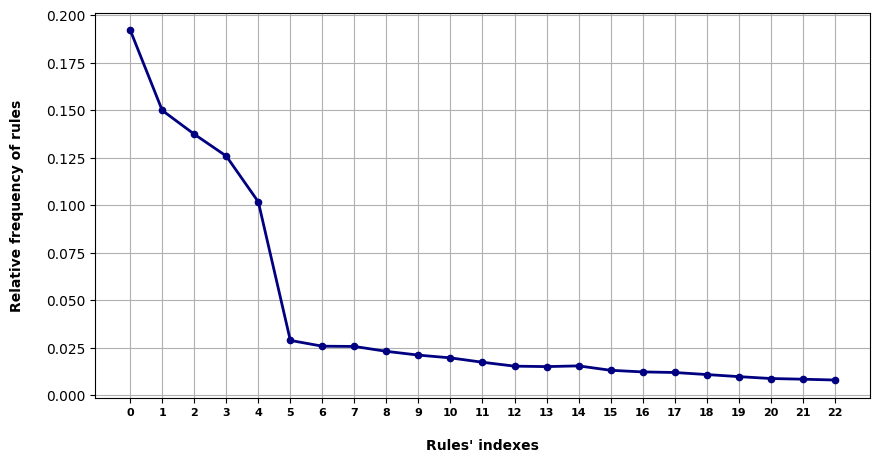

In [ ]:
a.plot_profile(g_profile_b, list(g_general_mapping.keys()))

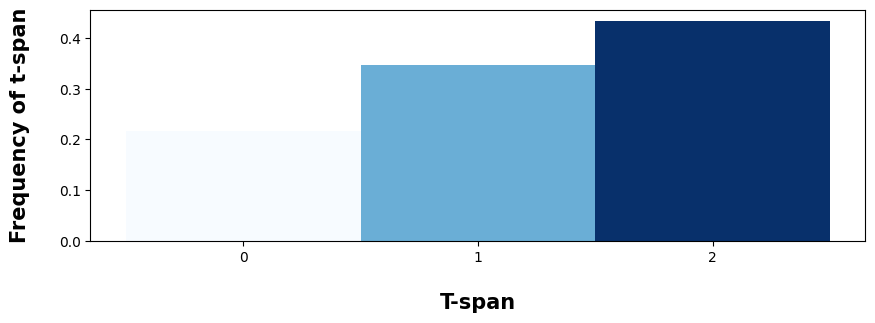

In [ ]:
spans_b = a.t_span_plot(g_new_pattern_list_b,
               cmap = 'Blues',
                fs = (10,3),
                 cbar_ticks_size = 25,
                 plot_params = {'ms' : 9, 'lw' : 2, 'style':'.-'},
                 ticks_params = {'fontsize_x':10, 'rotation_x':0,'fontweight_x':'bold',
                                'fontsize_y':10, 'rotation_y':0,'fontweight_y':'bold'},
                 label_params = {'xlabel': "\nT-span", 'fontsize_x' :15, 'fontweight_x':'bold',
                                'ylabel': "Frequency of t-span\n", 'fontsize_y' :15, 'fontweight_y':'bold'})
    

## Evomine

In [ ]:
general_mapping = pickle.load(open('evomine_general_mapping.p','rb'))
e_profile = a.get_profiles(e_new_support, list(general_mapping.keys()), './processed-outputs/',)

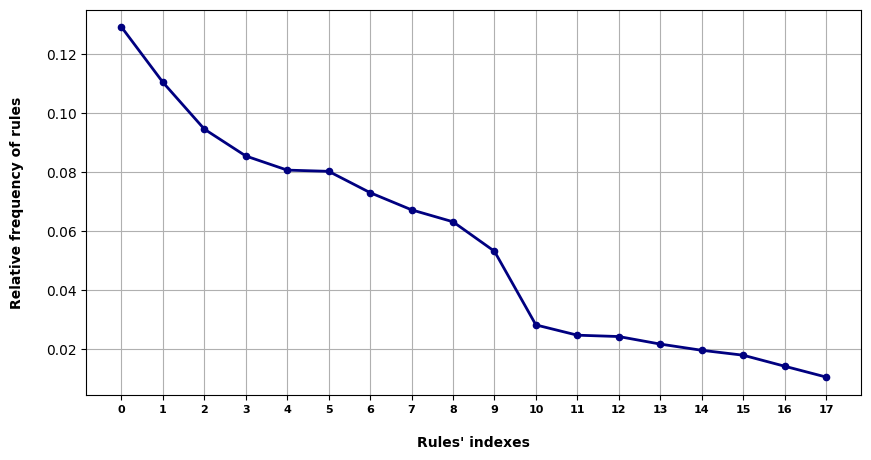

In [ ]:
a.plot_profile(e_profile, list(general_mapping.keys()))

In [ ]:
e_profile_b = a.get_profiles(e_new_support_b, list(general_mapping.keys()), './processed-outputs/',)

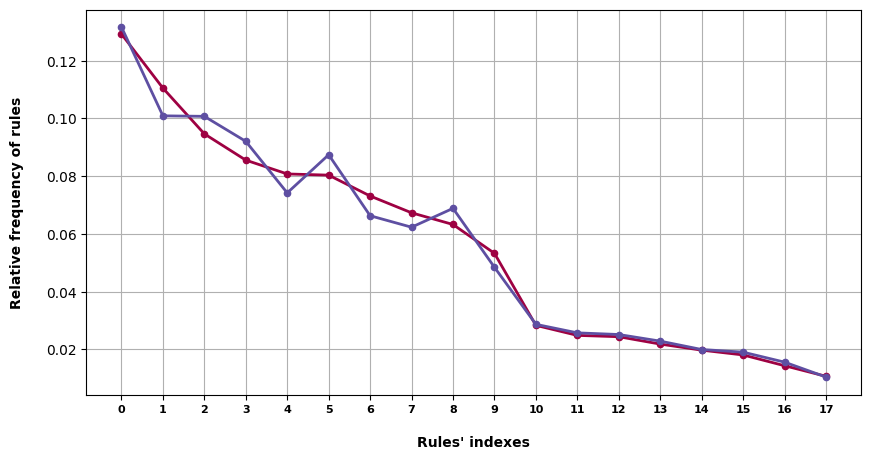

In [ ]:
a.plot_profile([e_profile,e_profile_b], list(general_mapping.keys()), single_profile=False)

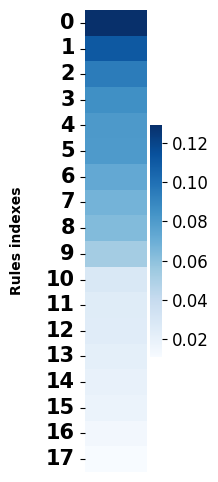

In [ ]:
a.plot_heatmap(e_profile, 
               list(general_mapping.keys()),
               fs=(1,6),
               cbar_ticks_size = 12,
               ticks_params = {'fontsize_x':25, 'rotation_x':0,'fontweight_x':'bold',
                                'fontsize_y':15, 'rotation_y':0,'fontweight_y':'bold'},
              label_params = {'xlabel': "", 'fontsize_x' :10, 'fontweight_x':'bold',
                                'ylabel': "Rules indexes\n", 'fontsize_y' :10, 'fontweight_y':'bold'})


# drawing 

## GERM

edges  ((0, 1, 0), (0, 3, 1), (1, 2, 1))


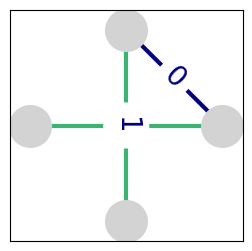

In [ ]:
d.draw_pattern_ger('germ', [p['edges'] for p in g_new_pattern_list.values()][10],
                             w = 3,h = 3)

edges  ((0, 1, 0),)
edges  ((0, 1, 0), (1, 2, 0))
edges  ((0, 1, 0), (0, 2, 0), (1, 2, 0))
edges  ((0, 1, 0), (1, 2, 0), (2, 3, 0))
edges  ((0, 1, 0), (1, 2, 0), (1, 3, 0))
edges  ((0, 1, 0), (1, 2, 1))
edges  ((0, 1, 0), (1, 2, 1), (2, 3, 1))
edges  ((0, 1, 0), (1, 2, 0), (2, 3, 1))
edges  ((0, 1, 0), (1, 2, 0), (1, 3, 1))
edges  ((0, 1, 0), (1, 2, 1), (1, 3, 1))
edges  ((0, 1, 0), (0, 3, 1), (1, 2, 1))
edges  ((0, 1, 0), (1, 2, 2))
edges  ((0, 1, 0), (1, 2, 2), (2, 3, 2))
edges  ((0, 1, 0), (1, 2, 0), (2, 3, 2))
edges  ((0, 1, 0), (1, 2, 1), (2, 3, 0))
edges  ((0, 1, 0), (1, 2, 0), (1, 3, 2))
edges  ((0, 1, 0), (1, 2, 2), (1, 3, 2))
edges  ((0, 1, 0), (0, 2, 1), (1, 2, 1))
edges  ((0, 1, 0), (0, 3, 2), (1, 2, 2))
edges  ((0, 1, 0), (0, 3, 2), (1, 2, 1))


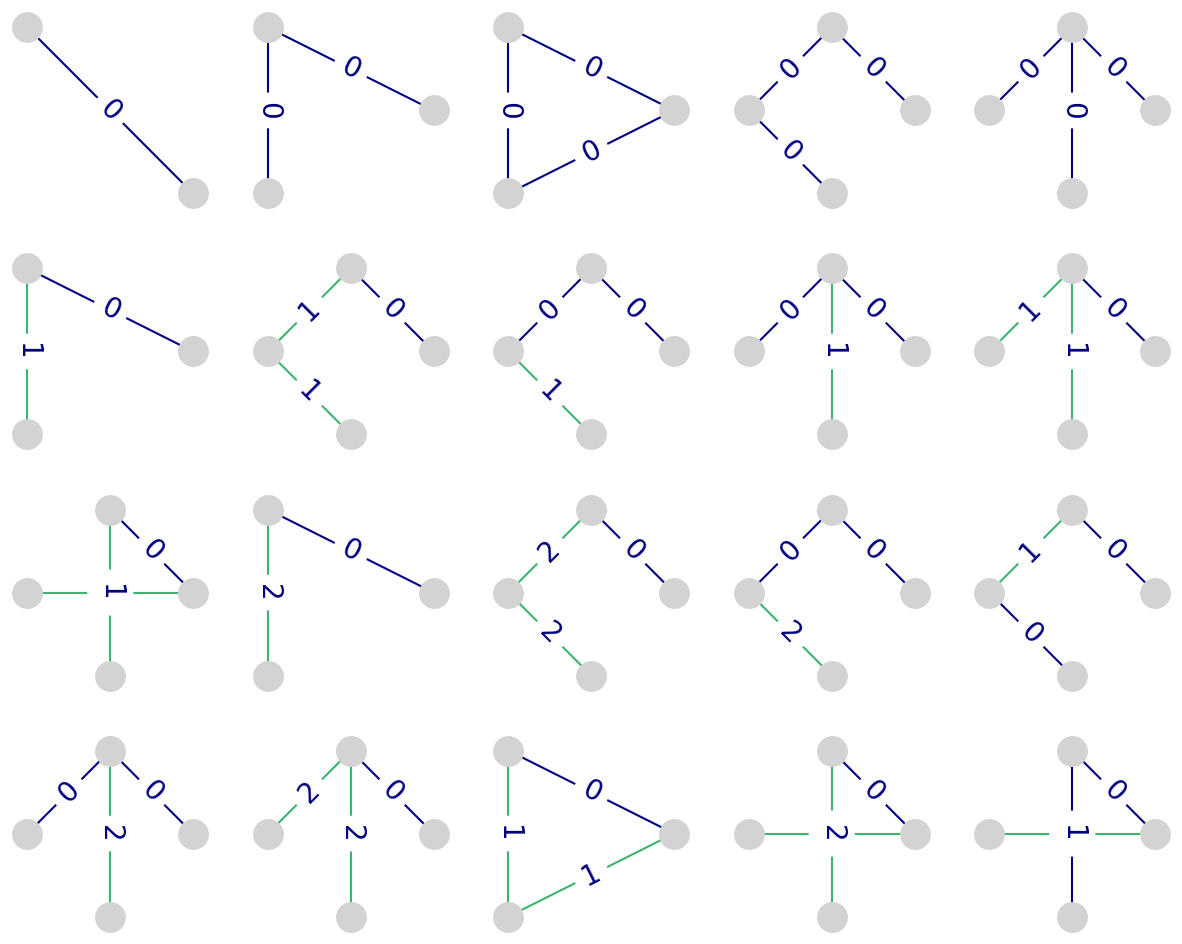

In [ ]:
d.draw_several_patterns('germ', g_new_pattern_list, 
                          columns = 5, w_box = 3)


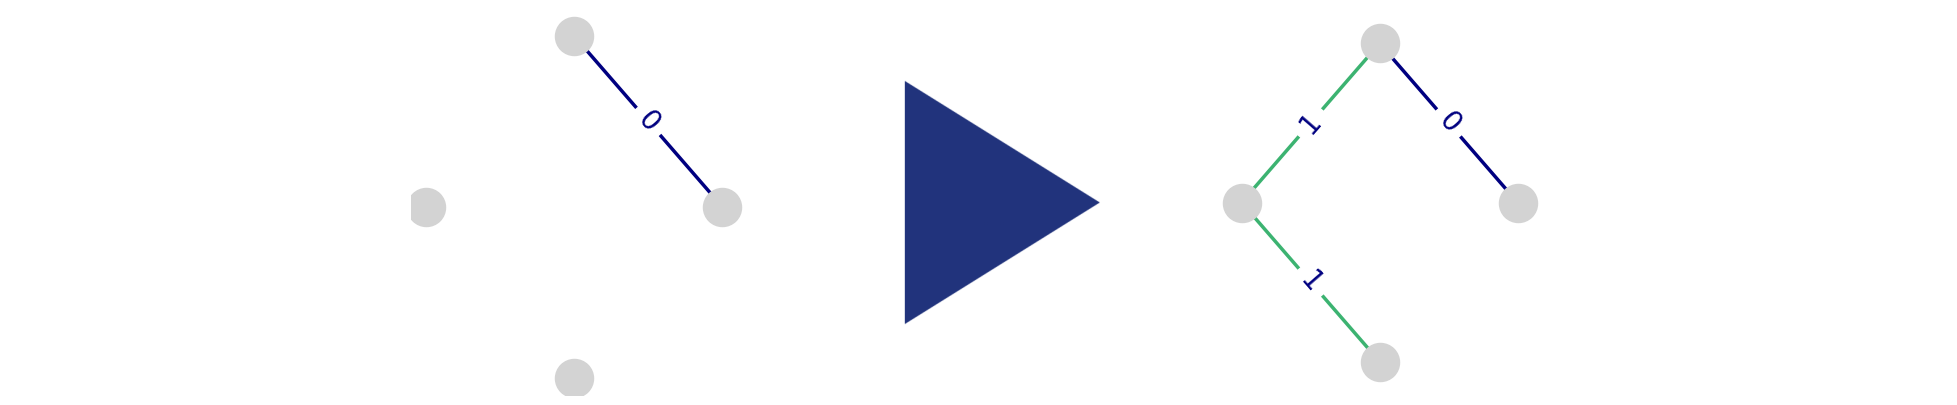

In [ ]:
d.draw_rule('germ', [p['edges'] for p in g_new_pattern_list.values()][12], w_box = 5)

## EvoMine

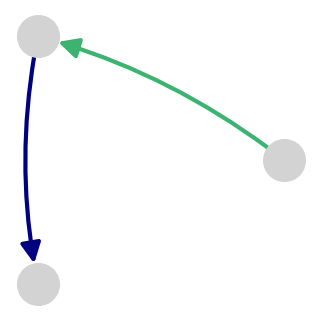

In [ ]:
d.draw_pattern_ger('evomine', [p['edges'] for p in e_new_pattern_list.values()][10],
                             w = 3,h = 3)

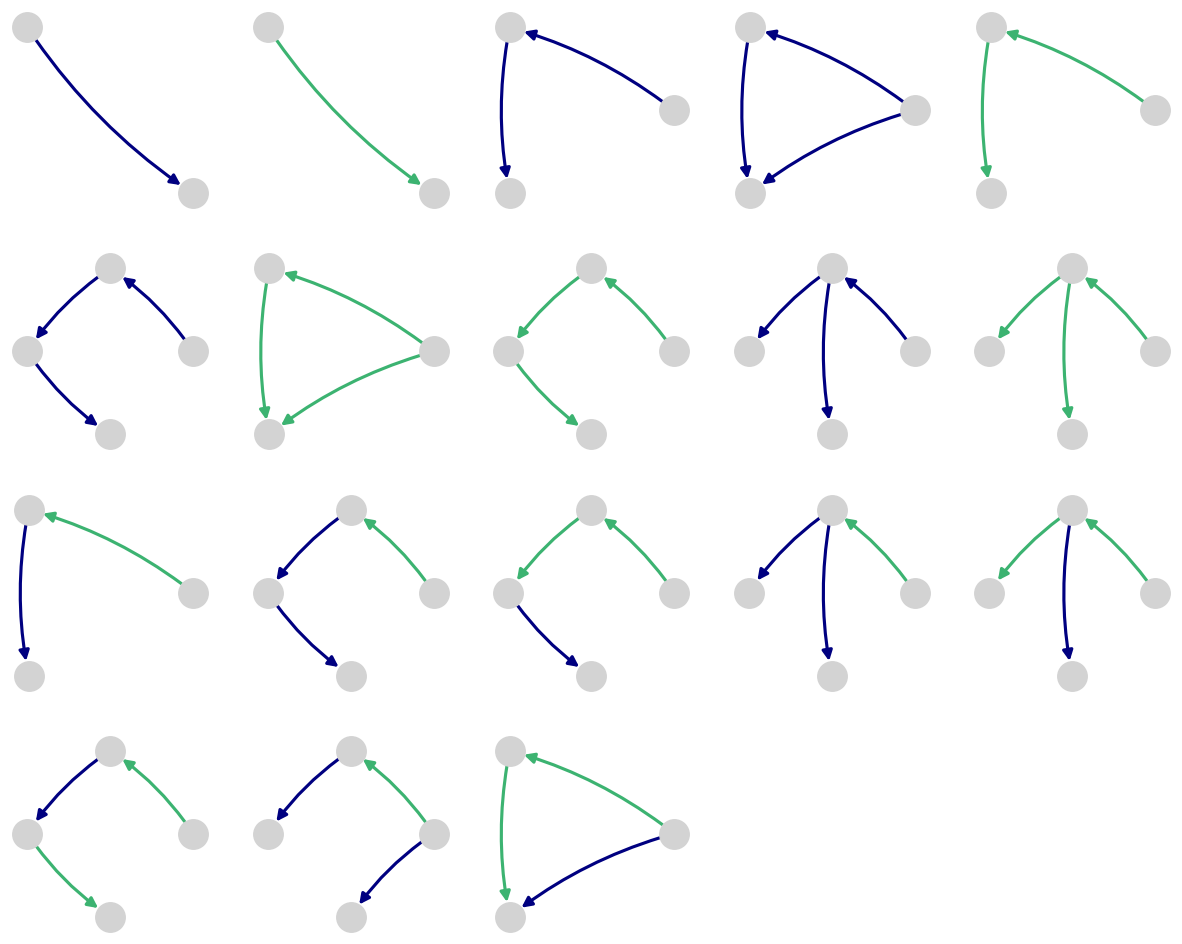

In [ ]:
d.draw_several_patterns('evomine', e_new_pattern_list, 
                          columns = 5, w_box = 3)

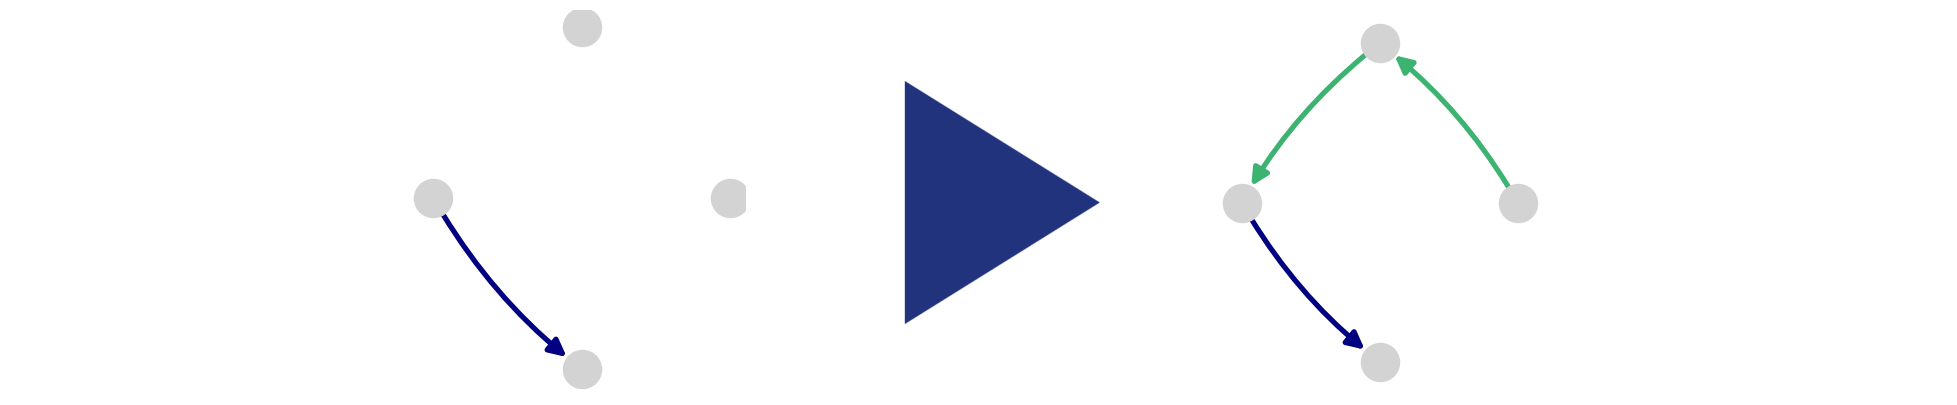

In [ ]:
d.draw_rule('evomine', [p['edges'] for p in e_new_pattern_list.values()][12], w_box = 5)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=610e0907-6802-4939-b7da-d8a5a67aba28' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>